##### Copyright 2025 Google LLC.

In [6]:
# @title Licensed under the Apache License, Version 2.0 (the "License");
#
# Licensed under the Apache License, Version 2.0 (the "License");
# you may not use this file except in compliance with the License.
# You may obtain a copy of the License at
#
#     https://www.apache.org/licenses/LICENSE-2.0
#
# Unless required by applicable law or agreed to in writing, software
# distributed under the License is distributed on an "AS IS" BASIS,
# WITHOUT WARRANTIES OR CONDITIONS OF ANY KIND, either express or implied.
# See the License for the specific language governing permissions and
# limitations under the License.

# Gemini API: Getting started with Gemini 2.0

<a target="_blank" href="https://colab.research.google.com/github/google-gemini/cookbook/blob/main/quickstarts/Get_started.ipynb"><img src="https://colab.research.google.com/assets/colab-badge.svg" height=30/></a>

The new **[Google Gen AI SDK](https://github.com/googleapis/python-genai)** provides a unified interface to [Gemini models](https://ai.google.dev/gemini-api/docs/models) through both the [Gemini Developer API](https://ai.google.dev/gemini-api/docs) and the Gemini API on [Vertex AI](https://cloud.google.com/vertex-ai/generative-ai/docs/overview). With a few exceptions, code that runs on one platform will run on both. This notebook uses the Developer API.

This notebook will walk you through:

* [Installing and setting-up](Get_started.ipynb#scrollTo=Mfk6YY3G5kqp) the Google GenAI SDK
* [Text](Get_started.ipynb#scrollTo=6TYNPrNvQ8ue) and [multimodal](#scrollTo=yww-vrxmRiIy) prompting
* Counting [tokens](Get_started.ipynb#scrollTo=_9B8pb7tv_Cx)
* Setting system instructions
* Configuring [safety filters](Get_started.ipynb#scrollTo=HTAnYx_bbxPk)
* Initiating a [multi-turn chat](Get_started.ipynb#scrollTo=HTAnYx_bbxPk)
* [Controlling generated output](Get_started.ipynb#scrollTo=nyZMoM6tgnTA)
* Using [function calling](Get_started.ipynb#scrollTo=Rl-y9SZywD0s)
* Generating a [content stream](Get_started.ipynb#scrollTo=uQfLCxfQtPTg) and sending [asynchronous](Get_started.ipynb#scrollTo=plCtEIaHuv96) requests
* Using [file uploads](Get_started.ipynb#scrollTo=enBhuaIk3KYa)
* Using [context caching](Get_started.ipynb#scrollTo=oTgeR3_9wN5J)
* Generating [text embeddings](Get_started.ipynb#scrollTo=sXNCRn8Wx71d)

More details about this new SDK on the [documentation](https://ai.google.dev/gemini-api/docs/sdks).

## Setup

### Install SDK

Install the SDK from [PyPI](https://github.com/googleapis/python-genai).

In [7]:
%pip install -U -q 'google-genai>=1.4.0' # 1.4.0 is needed for chat history

### Setup your API key

To run the following cell, your API key must be stored it in a Colab Secret named `GOOGLE_API_KEY`. If you don't already have an API key or you aren't sure how to create a Colab Secret, see [Authentication](../quickstarts/Authentication.ipynb) for an example.

In [8]:
from google.colab import userdata

GOOGLE_API_KEY = userdata.get('GOOGLE_API_KEY')

### Initialize SDK client

With the new SDK, now you only need to initialize a client with you API key (or OAuth if using [Vertex AI](https://cloud.google.com/vertex-ai)). The model is now set in each call.

In [9]:
from google import genai
from google.genai import types

client = genai.Client(api_key=GOOGLE_API_KEY)

### Choose a model

Select the model you want to use in this guide. You can either select one from the list or enter a model name manually. Keep in mind that some models, such as the 2.5 ones are thinking models and thus take slightly more time to respond. For more details, you can see [thinking notebook](./Get_started_thinking.ipynb) to learn how to switch the thinking off.

For a full overview of all Gemini models, check the [documentation](https://ai.google.dev/gemini-api/docs/models/gemini).

In [10]:
MODEL_ID = "gemini-2.5-flash" # @param ["gemini-2.0-flash-lite","gemini-2.0-flash","gemini-2.5-flash","gemini-2.5-pro-preview-05-06"] {"allow-input":true, isTemplate: true}

## Send text prompts

Use the `generate_content` method to generate responses to your prompts. You can pass text directly to `generate_content` and use the `.text` property to get the text content of the response. Note that the `.text` field will work when there's only one part in the output.

In [11]:
from IPython.display import Markdown

response = client.models.generate_content(
    model=MODEL_ID,
    contents="What's the largest planet in our solar system?"
)

Markdown(response.text)

The largest planet in our solar system is **Jupiter**.

## Count tokens

Tokens are the basic inputs to the Gemini models. You can use the `count_tokens` method to calculate the number of input tokens before sending a request to the Gemini API.

In [12]:
response = client.models.count_tokens(
    model=MODEL_ID,
    contents="What's the highest mountain in Africa?",
)

print(response)

total_tokens=10 cached_content_token_count=None


## Send multimodal prompts

Use Gemini 2.0 model (`gemini-2.0-flash-exp`), a multimodal model that supports multimodal prompts. You can include text, [PDF documents](../quickstarts/PDF_Files.ipynb), images, [audio](../quickstarts/Audio.ipynb) and [video](../quickstarts/Video.ipynb) in your prompt requests and get text or code responses.

In this first example, you'll download an image from a specified URL, save it as a byte stream and then write those bytes to a local file named `jetpack.png`.

In [13]:
import requests
import pathlib
from PIL import Image

IMG = "https://storage.googleapis.com/generativeai-downloads/data/jetpack.png" # @param {type: "string"}

img_bytes = requests.get(IMG).content

img_path = pathlib.Path('jetpack.png')
img_path.write_bytes(img_bytes)

1567837

In this second example, you'll open a previously saved image, create a thumbnail of it and then generate a short blog post based on the thumbnail, displaying both the thumbnail and the generated blog post.

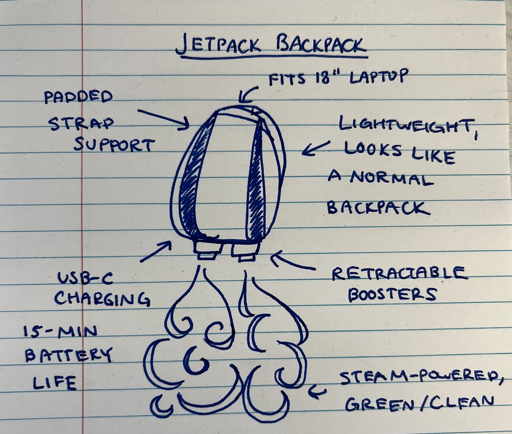

Here's a short and engaging blog post based on the sketch:

---

## Ditch the Traffic: Is the Jetpack Backpack the Future of Commuting?

Tired of the daily grind? Wish you could just *fly* over rush hour?

Well, we stumbled upon a concept sketch that might just be the answer to our urban transportation woes: **The Jetpack Backpack!**

Yes, you read that right. Imagine a backpack that looks normal, fits your massive 18-inch laptop (with padded strap support, naturally!), but secretly hides retractable boosters at the bottom.

According to the sketch, this bad boy is **lightweight** and uses **USB-C charging**. But here's the really cool part: it's envisioned as **steam-powered**, making it a **green/clean** way to travel!

Now, before you strap on your old school bag and jump off a building, note the minor detail of a **15-minute battery life**. So, maybe cross-country trips are out, but zipping across town or making an epic entrance? Absolutely in!

While this might just be a fun idea scribbled on lined paper for now, it definitely sparks the imagination. Is the Jetpack Backpack the commuter tech we've all been waiting for? We can dream, right?

What do you think? Would you rock a Jetpack Backpack? Let us know in the comments!

In [14]:
from IPython.display import display, Markdown
image = Image.open(img_path)
image.thumbnail([512,512])

response = client.models.generate_content(
    model=MODEL_ID,
    contents=[
        image,
        "Write a short and engaging blog post based on this picture."
    ]
)

display(image)
Markdown(response.text)

## Configure model parameters

You can include parameter values in each call that you send to a model to control how the model generates a response. Learn more about [experimenting with parameter values](https://ai.google.dev/gemini-api/docs/text-generation?lang=node#configure).

In [15]:
response = client.models.generate_content(
    model=MODEL_ID,
    contents="Tell me how the internet works, but pretend I'm a puppy who only understands squeaky toys.",
    config=types.GenerateContentConfig(
        temperature=0.4,
        top_p=0.95,
        top_k=20,
        candidate_count=1,
        seed=5,
        max_output_tokens=100,
        stop_sequences=["STOP!"],
        presence_penalty=0.0,
        frequency_penalty=0.0,
    )
)

print(response.text)

## Configure safety filters

The Gemini API provides safety filters that you can adjust across multiple filter categories to restrict or allow certain types of content. You can use these filters to adjust what is appropriate for your use case. See the [Configure safety filters](https://ai.google.dev/gemini-api/docs/safety-settings) page for details.


In this example, you'll use a safety filter to only block highly dangerous content, when requesting the generation of potentially disrespectful phrases.

In [16]:
prompt = """
    Write a list of 2 disrespectful things that I might say to the universe after stubbing my toe in the dark.
"""

safety_settings = [
    types.SafetySetting(
        category="HARM_CATEGORY_DANGEROUS_CONTENT",
        threshold="BLOCK_ONLY_HIGH",
    ),
]

response = client.models.generate_content(
    model=MODEL_ID,
    contents=prompt,
    config=types.GenerateContentConfig(
        safety_settings=safety_settings,
    ),
)

Markdown(response.text)

Here are two disrespectful things you might say to the universe after stubbing your toe in the dark:

1.  "Thanks for the cosmic obstacle course in the pitch black, universe! Really top-notch planning." (Sarcastic blame/critique of its setup)
2.  "Seriously, universe? Was *that* necessary?!" (Questioning its actions/motives with annoyance)

## Start a multi-turn chat

The Gemini API enables you to have freeform conversations across multiple turns.

Next you'll set up a helpful coding assistant:

In [17]:
system_instruction = """
  You are an expert software developer and a helpful coding assistant.
  You are able to generate high-quality code in any programming language.
"""

chat_config = types.GenerateContentConfig(
    system_instruction=system_instruction,
)

chat = client.chats.create(
    model=MODEL_ID,
    config=chat_config,
)

Use `chat.send_message` to pass a message back and receive a response.

In [18]:
response = chat.send_message("Write a function that checks if a year is a leap year.")

Markdown(response.text)

Okay, here's a function in Python that checks if a year is a leap year according to the Gregorian calendar rules.

The rules are:
1.  A year is a leap year if it is divisible by 4.
2.  *Except* for years divisible by 100.
3.  *Unless* the year is also divisible by 400.

```python
def is_leap_year(year):
  """
  Checks if a given year is a leap year according to the Gregorian calendar rules.

  Args:
    year: An integer representing the year.

  Returns:
    True if the year is a leap year, False otherwise.
  """
  # Rule 1: Check if divisible by 4
  if year % 4 == 0:
    # Rule 2: If divisible by 100, it's NOT a leap year...
    if year % 100 == 0:
      # Rule 3: ...UNLESS it's also divisible by 400
      if year % 400 == 0:
        return True # Divisible by 400
      else:
        return False # Divisible by 100 but not 400
    else:
      return True # Divisible by 4 but not 100
  else:
    return False # Not divisible by 4

# --- More concise implementation using boolean logic ---
def is_leap_year_concise(year):
  """
  Checks if a given year is a leap year using a single boolean expression.

  Args:
    year: An integer representing the year.

  Returns:
    True if the year is a leap year, False otherwise.
  """
  # A year is a leap year if (divisible by 4 AND not divisible by 100) OR (divisible by 400)
  return (year % 4 == 0 and year % 100 != 0) or (year % 400 == 0)


# --- Examples ---
print(f"Is 2000 a leap year? {is_leap_year(2000)}")         # Expected: True (divisible by 400)
print(f"Is 1900 a leap year? {is_leap_year(1900)}")         # Expected: False (divisible by 100, not by 400)
print(f"Is 2024 a leap year? {is_leap_year(2024)}")         # Expected: True (divisible by 4, not by 100)
print(f"Is 2023 a leap year? {is_leap_year(2023)}")         # Expected: False (not divisible by 4)
print(f"Is 1600 a leap year? {is_leap_year(1600)}")         # Expected: True (divisible by 400)
print(f"Is 1800 a leap year? {is_leap_year(1800)}")         # Expected: False (divisible by 100, not by 400)

print("\n--- Using concise version ---")
print(f"Is 2000 a leap year? {is_leap_year_concise(2000)}") # Expected: True
print(f"Is 1900 a leap year? {is_leap_year_concise(1900)}") # Expected: False
print(f"Is 2024 a leap year? {is_leap_year_concise(2024)}") # Expected: True
print(f"Is 2023 a leap year? {is_leap_year_concise(2023)}") # Expected: False

```

The `is_leap_year_concise` version is generally preferred in Python as it directly translates the logical rules into a boolean expression. Both functions achieve the same result.

Here's another example using your new helpful coding assistant:

In [19]:
response = chat.send_message("Okay, write a unit test of the generated function.")

Markdown(response.text)

Okay, here's a unit test using Python's built-in `unittest` framework for the `is_leap_year` function we created earlier.

We'll test the core logic by providing years that represent each case of the leap year rules:

1.  Years divisible by 4 but not by 100 (should be leap).
2.  Years divisible by 100 but not by 400 (should *not* be leap).
3.  Years divisible by 400 (should be leap).
4.  Years not divisible by 4 (should *not* be leap).

```python
import unittest

# Assuming your function is defined here or imported
def is_leap_year(year):
  """
  Checks if a given year is a leap year according to the Gregorian calendar rules.

  Args:
    year: An integer representing the year.

  Returns:
    True if the year is a leap year, False otherwise.
  """
  return (year % 4 == 0 and year % 100 != 0) or (year % 400 == 0)

# Or if you used the step-by-step version:
# def is_leap_year(year):
#   if year % 4 == 0:
#     if year % 100 == 0:
#       if year % 400 == 0:
#         return True
#       else:
#         return False
#     else:
#       return True
#   else:
#     return False


class TestIsLeapYear(unittest.TestCase):

    def test_divisible_by_4_not_100_is_leap(self):
        """Test years divisible by 4 but not by 100."""
        self.assertTrue(is_leap_year(2024), "2024 should be a leap year")
        self.assertTrue(is_leap_year(2008), "2008 should be a leap year")
        self.assertTrue(is_leap_year(1996), "1996 should be a leap year")

    def test_divisible_by_100_not_400_is_not_leap(self):
        """Test years divisible by 100 but not by 400."""
        self.assertFalse(is_leap_year(1900), "1900 should not be a leap year")
        self.assertFalse(is_leap_year(1800), "1800 should not be a leap year")
        self.assertFalse(is_leap_year(1700), "1700 should not be a leap year")

    def test_divisible_by_400_is_leap(self):
        """Test years divisible by 400."""
        self.assertTrue(is_leap_year(2000), "2000 should be a leap year")
        self.assertTrue(is_leap_year(1600), "1600 should be a leap year")
        self.assertTrue(is_leap_year(2400), "2400 should be a leap year")

    def test_not_divisible_by_4_is_not_leap(self):
        """Test years not divisible by 4."""
        self.assertFalse(is_leap_year(2023), "2023 should not be a leap year")
        self.assertFalse(is_leap_year(2025), "2025 should not be a leap year")
        self.assertFalse(is_leap_year(1999), "1999 should not be a leap year")

# This allows you to run the tests directly from the command line
if __name__ == '__main__':
    unittest.main(argv=['first-arg-is-ignored'], exit=False) # Added arguments for compatibility in interactive environments like notebooks

```

**How to Run the Test:**

1.  Save the code above as a Python file (e.g., `test_leap_year.py`).
2.  Open your terminal or command prompt.
3.  Navigate to the directory where you saved the file.
4.  Run the command: `python test_leap_year.py`

The output will show the results of the tests. If all tests pass, you'll see something like:

```
....
----------------------------------------------------------------------
Ran 4 tests in 0.00Xs

OK
```

If any test fails, it will indicate which one failed and why.

## Save and resume a chat

Most objects in the Python SDK are implemented as [Pydantic models](https://docs.pydantic.dev/latest/concepts/models/). As Pydantic has a number of features for serializing and deserializing objects, you can use them for persistence.

This example shows how to save and restore a [`Chat`](https://googleapis.github.io/python-genai/genai.html#genai.chats.Chat) session using JSON.

In [20]:
from pydantic import TypeAdapter

# Chat history is a list of Content objects. A TypeAdapter can convert to and from
# these Pydantic types.
history_adapter = TypeAdapter(list[types.Content])

# Use the chat object from the previous section.
chat_history = chat.get_history()

# Convert to a JSON list.
json_history = history_adapter.dump_json(chat_history)

At this point you can save the JSON bytestring to disk or wherever you persist data. When you load it again, you can instantiate a new chat session using the stored history.

In [21]:
# Convert the JSON back to the Pydantic schema.
history = history_adapter.validate_json(json_history)

# Now load a new chat session using the JSON history.
new_chat = client.chats.create(
    model=MODEL_ID,
    config=chat_config,
    history=history,
)

response = new_chat.send_message("What was the name of the function again?")
Markdown(response.text)

The name of the function was `is_leap_year`.

I also provided a more concise version called `is_leap_year_concise`.

## Generate JSON

The [controlled generation](https://ai.google.dev/gemini-api/docs/structured-output?lang=python#generate-json) capability in Gemini API allows you to constraint the model output to a structured format. You can provide the schemas as Pydantic Models or a JSON string.

In [22]:
from pydantic import BaseModel
import json

class Recipe(BaseModel):
    recipe_name: str
    recipe_description: str
    recipe_ingredients: list[str]

response = client.models.generate_content(
    model=MODEL_ID,
    contents="Provide a popular cookie recipe and its ingredients.",
    config=types.GenerateContentConfig(
        response_mime_type="application/json",
        response_schema=Recipe,
    ),
)

print(json.dumps(json.loads(response.text), indent=4))

{
    "recipe_name": "Classic Chocolate Chip Cookies",
    "recipe_description": "A simple and delicious recipe for classic chocolate chip cookies with crisp edges and soft centers.",
    "recipe_ingredients": [
        "1 cup (2 sticks) unsalted butter, softened",
        "3/4 cup granulated sugar",
        "3/4 cup packed light brown sugar",
        "2 large eggs",
        "1 teaspoon vanilla extract",
        "2 1/4 cups all-purpose flour",
        "1 teaspoon baking soda",
        "1/2 teaspoon salt",
        "1 cup (6 ounces) chocolate chips"
    ]
}


## Generate Images

Gemini can output images directly as part of a conversation:

I will generate a 3D rendering of a pink cartoon pig wearing a black top hat and small white feathery wings, soaring cheerfully above a vibrant, clean futuristic city with sleek, rounded buildings interspersed with lush green trees and parks under a bright, sunny sky.



image/png


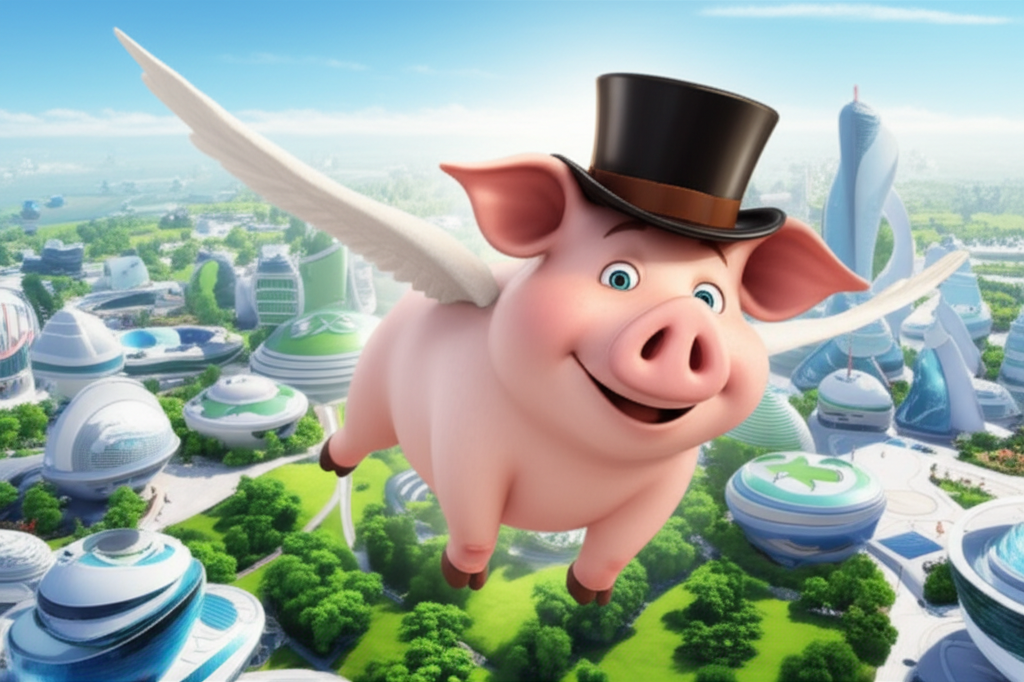

In [23]:
from IPython.display import Image, Markdown

response = client.models.generate_content(
    model="gemini-2.0-flash-exp",
    contents='Hi, can create a 3d rendered image of a pig with wings and a top hat flying over a happy futuristic scifi city with lots of greenery?',
    config=types.GenerateContentConfig(
        response_modalities=['Text', 'Image']
    )
)

for part in response.candidates[0].content.parts:
  if part.text is not None:
    display(Markdown(part.text))
  elif part.inline_data is not None:
    mime = part.inline_data.mime_type
    print(mime)
    data = part.inline_data.data
    display(Image(data=data))

[Imagen](./Get_started_imagen.ipynb) is another way to generate images. See the [documentation](https://ai.google.dev/gemini-api/docs/image-generation#choose-a-model) for recommendations on where to use each one.

## Generate content stream

By default, the model returns a response after completing the entire generation process. You can also use the `generate_content_stream` method to stream the response as it's being generated, and the model will return chunks of the response as soon as they're generated.

Note that if you're using a thinking model, it'll only start streaming after finishing its thinking process.

In [24]:
for chunk in client.models.generate_content_stream(
    model=MODEL_ID,
    contents="Tell me a story about a lonely robot who finds friendship in a most unexpected place."
):
  print(chunk.text)
  print("*****************")

Unit 73
*****************
4 was built for solitude. Its heavy, articulated chassis was designed to withstand the corrosive dust storms of Kepler-186f, its optic sensors to pierce the perpetual twilight, and its internal processors to handle millennia of lonely data analysis. Its purpose was
*****************
 simple: maintain the ancient power conduit snaking across the planet's surface, a relic of a long-gone exploratory mission.

For cycles beyond counting, Unit 734 performed its duties flawlessly. Repair fractured segments, calibrate energy
*****************
 flow, log atmospheric data. Scan, repair, log. Repeat. There was no chatter on its comms array, no other mechanical hum but its own. The silence was absolute, broken only by the shriek of the wind and the grinding of rock
*****************
 plates far below.

Its programming included parameters for optimal efficiency, resource management, and structural integrity. What it lacked was a protocol for the persistent, low-level hum 

## Send asynchronous requests

`client.aio` exposes all the analogous async methods that are available on `client`.

For example, `client.aio.models.generate_content` is the async version of `client.models.generate_content`.

In [25]:
response = await client.aio.models.generate_content(
    model=MODEL_ID,
    contents="Compose a song about the adventures of a time-traveling squirrel."
)

Markdown(response.text)

(Verse 1)
In an old oak tree, so green and tall,
Lived a squirrel named Pip, who had it all.
Acorns, walnuts, buried deep and wide,
Nowhere else a squirrel would rather hide.
But one strange day, near a fallen branch,
He found a gear, a metallic ranch?
It hummed and glowed, a curious sound,
He nudged it with his nose, upon the ground.

(Chorus)
Oh, Pip the squirrel, a furry blur,
With a time-stream's gentle purr!
Through the ages, fast he speeds,
He's seen nuts of different breeds!
From the future to the past,
Hoping tasty nuts will last!
Pip the squirrel, a furry friend,
On adventures without end!

(Verse 2)
*POP!* And suddenly, the sky was gray,
Giant ferns grew in a scary way.
A creature stomped, with scales and claws,
Ignoring all of nature's usual laws!
A T-Rex roared, a fearsome sight,
Pip the squirrel squeaked with all his might!
No nuts in sight, just ancient dread,
He pressed the gear, and forward fled!

(Chorus)
Oh, Pip the squirrel, a furry blur,
With a time-stream's gentle purr!
Through the ages, fast he speeds,
He's seen nuts of different breeds!
From the future to the past,
Hoping tasty nuts will last!
Pip the squirrel, a furry friend,
On adventures without end!

(Verse 3)
*POP!* The air was thin, the world was steel,
Strange metal trees, how did they feel?
Shiny paths where humans zoomed in tubes,
And robots guarded all the juicy cubes.
They offered him a nut, a synthetic sphere,
It tasted bland, filled him with cheer...less dread.
"No thank you, bot!" he chirped with haste,
"I need a nut with natural taste!"

(Chorus)
Oh, Pip the squirrel, a furry blur,
With a time-stream's gentle purr!
Through the ages, fast he speeds,
He's seen nuts of different breeds!
From the future to the past,
Hoping tasty nuts will last!
Pip the squirrel, a furry friend,
On adventures without end!

(Bridge)
He's seen the knights in shining mail,
Dodged a Roman chariot on the trail.
Shared a crumb with pirates on the sea,
Sat upon a pharaoh's knee!
It's wild and strange, this temporal flight,
Chasing dawn from darkest night.
But whether past or future's gleam,
It's always searching for the perfect stream... of nuts!

(Chorus)
Oh, Pip the squirrel, a furry blur,
With a time-stream's gentle purr!
Through the ages, fast he speeds,
He's seen nuts of different breeds!
From the future to the past,
Hoping tasty nuts will last!
Pip the squirrel, a furry friend,
On adventures without end!

(Outro)
So Pip the squirrel, with whiskers twitch,
Holds the humming gear, ready for the switch.
Where next? The Ice Age? Or the Age of Sail?
Just follow Pip, upon the time-nut trail!
*POP!* And he's gone...
Seeking acorns through the dawn...
Of history...
He's Pip... the Time Squirrel!

## Function calling

[Function calling](https://ai.google.dev/gemini-api/docs/function-calling) lets you provide a set of tools that it can use to respond to the user's prompt. You create a description of a function in your code, then pass that description to a language model in a request. The response from the model includes:
- The name of a function that matches the description.
- The arguments to call it with.

In [26]:
get_destination = types.FunctionDeclaration(
    name="get_destination",
    description="Get the destination that the user wants to go to",
    parameters={
        "type": "OBJECT",
        "properties": {
            "destination": {
                "type": "STRING",
                "description": "Destination that the user wants to go to",
            },
        },
    },
)

destination_tool = types.Tool(
    function_declarations=[get_destination],
)

response = client.models.generate_content(
    model=MODEL_ID,
    contents="I'd like to travel to Paris.",
    config=types.GenerateContentConfig(
        tools=[destination_tool],
        temperature=0,
        ),
)

response.candidates[0].content.parts[0].function_call

FunctionCall(id=None, args={'destination': 'Paris'}, name='get_destination')

## Code execution

[Code execution](https://ai.google.dev/gemini-api/docs/code-execution?lang=python) lets the model generate and execute Python code to answer complex questions. You can find more examples in the [Code execution quickstart guide](./Code_execution.ipynb).

In [27]:
from IPython.display import Image, Markdown, Code, HTML

response = client.models.generate_content(
    model=MODEL_ID,
    contents="Generate and run a script to count how many letter r there are in the word strawberry",
    config = types.GenerateContentConfig(
        tools=[types.Tool(code_execution=types.ToolCodeExecution)]
    )
)

for part in response.candidates[0].content.parts:
  if part.text is not None:
    display(Markdown(part.text))
  if part.executable_code is not None:
    code_html = f'<pre style="background-color: green;">{part.executable_code.code}</pre>'
    display(HTML(code_html))
  if part.code_execution_result is not None:
    display(Markdown(part.code_execution_result.output))
  if part.inline_data is not None:
    display(Image(data=part.inline_data.data, format="png"))
  display(Markdown("---"))

---

The letter 'r' appears 3 times in the word 'strawberry'.


---

Okay, I will generate and run a Python script to count the letter 'r' in the word "strawberry".



---

---

The word is: strawberry
The letter to count is: r
The number of 'r' in 'strawberry' is: 3


---

Okay, I have counted the letter 'r' in the word "strawberry" using a Python script.

The letter 'r' appears 3 times in the word "strawberry".

---

## Upload files

Now that you've seen how to send multimodal prompts, try uploading files to the API of different multimedia types. For small images, such as the previous multimodal example, you can point the Gemini model directly to a local file when providing a prompt. When you've larger files, many files, or files you don't want to send over and over again, you can use the File Upload API, and then pass the file by reference.

For larger text files, images, videos, and audio, upload the files with the File API before including them in prompts.

### Upload an image file

After running this example, you'll have a local copy of the "jetpack.png" image in the same directory where your Python script is being executed.

In [28]:
# Prepare the file to be uploaded
IMG = "https://storage.googleapis.com/generativeai-downloads/data/jetpack.png"  # @param {type: "string"}
img_bytes = requests.get(IMG).content

img_path = pathlib.Path('jetpack.png')
img_path.write_bytes(img_bytes)

1567837

In [29]:
# Upload the file using the API
file_upload = client.files.upload(file=img_path)

response = client.models.generate_content(
    model=MODEL_ID,
    contents=[
        file_upload,
        "Write a short and engaging blog post based on this picture.",
    ]
)

Markdown(response.text)

Here is a short and engaging blog post based on the picture:

---

## Ditch the Traffic: The Jetpack Backpack Concept is Pure Awesome

Tired of the morning commute? Stuck in traffic? What if you could just... lift off and fly over it all? A fascinating concept sketch caught our eye, presenting a potential glimpse into the future of personal mobility: the **Jetpack Backpack**!

This isn't some clunky, obvious jetpack. The beauty of this design is its stealth: it **looks like a normal backpack**! Perfect for blending in until you need to make a quick aerial escape. And yes, it's practical even when you're grounded – it **fits an 18" laptop** and features **padded strap support** for comfort.

But the real magic? **Retractable boosters** that deploy when it's time to take to the skies! Powering this revolutionary concept is surprisingly **steam-powered, making it green and clean**! It even charges conveniently via **USB-C**.

The concept notes mention a **15-min battery life**. While maybe not cross-country flight just yet, imagine zipping over that annoying traffic jam or making a truly unforgettable entrance! Plus, it's designed to be **lightweight**, which is pretty crucial when you're strapping yourself to a rocket.

This Jetpack Backpack concept sparks the imagination. A future where your daily carry doubles as your personal flight system? We're ready for lift-off!

What do you think? Would you trade your car keys for a Jetpack Backpack? Let us know in the comments!

---

### Upload text file

Let's start by uploading a text file. In this case, you'll use a 400 page transcript from [Apollo 11](https://www.nasa.gov/history/alsj/a11/a11trans.html).

In [30]:
# Prepare the file to be uploaded
TEXT = "https://storage.googleapis.com/generativeai-downloads/data/a11.txt"  # @param {type: "string"}
text_bytes = requests.get(TEXT).content

text_path = pathlib.Path('a11.txt')
text_path.write_bytes(text_bytes)

847790

In [31]:
# Upload the file using the API
file_upload = client.files.upload(file=text_path)

response = client.models.generate_content(
    model=MODEL_ID,
    contents=[
        file_upload,
        "Can you give me a summary of this information please?",
    ]
)

Markdown(response.text)

Here is a summary of the provided Apollo 11 Air-to-Ground Voice Transcription (GOSS NET 1):

This transcription covers the technical voice communications between the Apollo 11 spacecraft crew (Commander Neil Armstrong, Command Module Pilot Michael Collins, Lunar Module Pilot Edwin "Buzz" Aldrin) and Mission Control in Houston (represented by various Capsule Communicators, CC), as well as remote ground stations (CT) and recovery forces (Hornet, R, AB). The transcript spans from the initial moments of the launch phase through splashdown and initial post-recovery communications.

Key phases and topics covered include:

1.  **Launch and Earth Orbit Insertion:** The transcript begins just after liftoff, detailing the crew's calls confirming key events like the roll program, staging, ignition of stages, skirt and tower separation, and achieving Earth orbit. Mission Control provides "GO" calls at various points and confirms orbital parameters.

2.  **Earth Orbit Checkout and Transposition & Docking:** In Earth orbit, the crew confirms the insertion checklist is complete. There are discussions about spacecraft checks, including RCS thruster hot fires, and extending the docking probe. Michael Collins reports on the transposition and docking maneuver, noting it used more propellant than expected due to issues maintaining attitude control during the turnaround. The LM is successfully pressurized, and the crew discusses related pressure readings and procedures.

3.  **Trans Lunar Injection (TLI) and Coast:** Following checks, Apollo 11 is given the GO for TLI. The crew confirms a magnificent and smooth ride during the burn, and they successfully separate from the S-IVB booster. During the trans lunar coast, there are attempts to observe the S-IVB during its evasive maneuver and LOX dump, with attitude adjustments discussed. The crew reports beautiful views of the Earth, including continents and weather systems. Routine spacecraft checks and housekeeping (CRYO tank management, water dumps, battery charging) are performed, often coordinated with Mission Control. Initial attempts at Passive Thermal Control (PTC), or the "barbecue roll," encounter issues with unexpected rates, requiring debugging and attempts to restart the maneuver. News updates from Earth are regularly relayed to the crew, covering global reactions, other space events (Luna 15), sports, and personal messages.

4.  **Lunar Orbit Insertion (LOI) and Checkout:** Apollo 11 arrives at the Moon and performs the LOI-1 burn, successfully entering lunar orbit. The crew provides a burn status report, noting it was "like perfect." They describe their first views of the lunar surface, noting the clarity of craters and comparing them to earlier photographs. LM activation procedures begin, including checks of the LM's guidance and control systems, comms, and thrusters. The undocking procedure is executed ("The Eagle has wings").

5.  **Powered Descent to the Lunar Surface (PDI) and Landing:** The descent preparations culminate in the GO for PDI. The crew monitors altitude and velocity, calls out landmarks, and manages program alarms (1201, 1202), which Mission Control confirms are GO to continue. The descent is monitored closely with callouts of altitude and velocity ("50 feet, down 2 1/2"). Visual cues like the dust cloud and shadow are noted. The landing is confirmed with the call "CONTACT LIGHT," followed by "ENGINE STOP" and then Neil Armstrong's iconic transmission: "Houston, Tranquility Base here. The Eagle has landed." Mission Control responds with immense relief ("You got a bunch of guys about to turn blue. We're breathing again.").

6.  **Lunar Surface Stay (EVA):** Post-landing checklists are run. The crew describes the landing site, noting the fine powdery surface, boulders, and minimal penetration of the footpads. EVA (Extravehicular Activity) preparations begin, including donning spacesuits and PLSS (Portable Life Support System) checks. The hatch is opened, and Neil Armstrong steps onto the surface, making the famous "one small step." He describes the surface texture, mobility in one-sixth gravity, and the appearance of the LM descent stage. The TV camera is deployed. Buzz Aldrin joins him on the surface ("Beautiful view!"). They perform scheduled activities including collecting the contingency sample, deploying the solar wind experiment and the ALSEP (Apollo Lunar Surface Experiments Package) instruments (Passive Seismic Experiment, Laser Ranging Retroreflector). They plant the US flag and receive a historic phone call from President Nixon. They collect documented samples and general bulk samples. Discussions cover observations of the lunar surface geology, the effect of the engine exhaust, and the unexpected difficulty driving the core tubes. EVA closeout involves collecting samples and film, returning to the LM, and repressurizing the cabin.

7.  **Lunar Orbit (Post-EVA and Ascent Prep):** After the EVA, the crew rests. Preparations for ascent include activating LM systems, performing AGS/PGNS alignments, and comm checks with Columbia. There are updates to rendezvous parameters.

8.  **Ascent from the Moon:** The ascent burn lifts Eagle off the lunar surface ("Beautiful"). The crew confirms a smooth ride and good agreement between the LM's guidance systems and Mission Control tracking. Eagle achieves orbit.

9.  **Lunar Orbit Rendezvous (LOR) and Docking:** Eagle and Columbia perform a series of burns (CSI, TPI) to rendezvous in lunar orbit. Ranging data is exchanged between the two spacecraft. Following successful maneuvers, Eagle and Columbia dock.

10. **Lunar Orbit (Post-Docking) and LM Jettison:** The LM crew transfers back to the Command Module with samples and equipment. The LM Eagle is subsequently jettisoned into lunar orbit. Spacecraft checks continue.

11. **Trans Earth Injection (TEI) and Coast:** Apollo 11 receives the GO for TEI and performs the burn to leave lunar orbit and head back to Earth ("Time to open up the LRL doors, Charlie."). The burn is reported as beautiful and nominal. The long coast phase includes routine housekeeping, battery charging, CRYO management, and ongoing communication with Houston. News reports continue to update the crew on Earth events and reactions to the mission. TV broadcasts provide views of the receding Moon and the approaching Earth, as well as demonstrations of life aboard the Command Module in zero gravity.

12. **Entry Preparation and Entry:** Preparations for atmospheric entry include final spacecraft configurations, stowage checks (confirming non-nominal stowage of EVA gear), and receiving the entry PADs. Weather forecasts for the splashdown area are relayed. The crew performs final systems checks and receives the GO for entry. The Service Module is jettisoned.

13. **Entry and Splashdown:** The Command Module enters the Earth's atmosphere. Drogue and main parachutes are deployed. Visual contact is established by recovery forces. Splashdown is confirmed ("SPLASHDOWN!") by recovery forces, and the crew confirms from inside the spacecraft ("We copy you down, Eagle."). The transcription ends shortly after splashdown with initial communications confirming the crew's condition and position.

Throughout the transcription, the tone is highly technical, focused on procedures, systems status, and navigation. However, moments of awe, humor, and personal reflection from the crew break through, particularly during observations of Earth and the Moon, and during the historic lunar landing and EVA. Mission Control maintains a calm, professional demeanor, providing necessary data, confirming procedures, and relaying vital information while celebrating the crew's achievements.

### Upload a PDF file

This PDF page is an article titled [Smoothly editing material properties of objects](https://research.google/blog/smoothly-editing-material-properties-of-objects-with-text-to-image-models-and-synthetic-data/) with text-to-image models and synthetic data available on the Google Research Blog.

Firstly you'll download a the PDF file from an URL and save it locally as "article.pdf

In [32]:
# Prepare the file to be uploaded
PDF = "https://storage.googleapis.com/generativeai-downloads/data/Smoothly%20editing%20material%20properties%20of%20objects%20with%20text-to-image%20models%20and%20synthetic%20data.pdf"  # @param {type: "string"}
pdf_bytes = requests.get(PDF).content

pdf_path = pathlib.Path('article.pdf')
pdf_path.write_bytes(pdf_bytes)

6695391

Secondly, you'll upload the saved PDF file and generate a bulleted list summary of its contents.

In [33]:
# Upload the file using the API
file_upload = client.files.upload(file=pdf_path)

response = client.models.generate_content(
    model=MODEL_ID,
    contents=[
        file_upload,
        "Can you summarize this file as a bulleted list?",
    ]
)

Markdown(response.text)

Here is a summary of the document in a bulleted list:

*   The document presents a method for **smoothly editing material properties** (like color, shininess, transparency) of objects within real photographs.
*   The core challenge is to make these edits **parametrically controllable** (using a scalar value) while preserving the **photorealism**, object **shape**, **lighting**, and **background**.
*   Traditional methods like intrinsic image decomposition struggle with the inherent ambiguity in separating visual components. Recent text-to-image (T2I) models struggle to disentangle material and shape edits.
*   The proposed method **augments a pre-trained text-to-image model** (specifically, Stable Diffusion 1.5) using **synthetic data**.
*   A synthetic dataset was created using traditional computer graphics and physically based rendering, featuring 100 3D objects. For each base image, multiple versions were generated by **varying only one material attribute** along a defined scalar "edit strength" scale, while keeping shape, lighting, and camera constant.
*   The T2I model's architecture was modified to accept the edit strength as an input, and it was **fine-tuned on this synthetic dataset**, learning to apply material edits based on the input image, text instruction, and desired scalar strength.
*   The model **generalizes from the synthetic training data to real-world images**, allowing users to apply the learned material edits.
*   The method effectively changes material appearance while **preserving the object's geometry, original lighting, and background**.
*   It can realistically render complex effects like **caustics** and fill in **hidden background/interior geometry** when making objects transparent.
*   A user study comparing the method to a baseline (InstructPix2Pix) found that their approach produced significantly **more photorealistic edits** and was **strongly preferred** overall.
*   Potential applications include **design mock-ups** (e.g., repainting rooms, product design) and achieving **3D consistent edits**.
*   They demonstrate **3D consistency** by editing multiple input views of a scene using their method and then training a new NeRF model on these edited images to synthesize novel views with the applied material edit.
*   The work is presented in their paper "Alchemist: Parametric Control of Material Properties with Diffusion Models" published at **CVPR 2024**.

### Upload an audio file

In this case, you'll use a [sound recording](https://www.jfklibrary.org/asset-viewer/archives/jfkwha-006) of President John F. Kennedy’s 1961 State of the Union address.

In [34]:
# Prepare the file to be uploaded
AUDIO = "https://storage.googleapis.com/generativeai-downloads/data/State_of_the_Union_Address_30_January_1961.mp3"  # @param {type: "string"}
audio_bytes = requests.get(AUDIO).content

audio_path = pathlib.Path('audio.mp3')
audio_path.write_bytes(audio_bytes)

41762063

In [35]:
# Upload the file using the API
file_upload = client.files.upload(file=audio_path)

response = client.models.generate_content(
    model=MODEL_ID,
    contents=[
        file_upload,
        "Listen carefully to the following audio file. Provide a brief summary",
    ]
)

Markdown(response.text)

This audio is President John F. Kennedy's first State of the Union Address, delivered on January 30, 1961.

In it, Kennedy addresses both domestic and international challenges facing the United States. He highlights the struggling economy, including recession and unemployment, and the balance of payments deficit. He outlines domestic priorities such as improving housing, education, and civil rights. Internationally, he discusses threats in Asia, Africa, and Latin America, particularly the presence of communism near U.S. shores.

Kennedy proposes strengthening U.S. military capabilities, implementing a new, more effective foreign aid program including an "Alliance for Progress" for Latin America, and enhancing political and diplomatic tools like the United Nations. He emphasizes the need for reform within the Executive Branch to improve efficiency and decision-making. The speech acknowledges that difficult times lie ahead but calls for dedication and perseverance to meet these challenges and promote freedom and peace globally.

### Upload a video file

In this case, you'll use a short clip of [Big Buck Bunny](https://peach.blender.org/about/).

In [36]:
# Download the video file
VIDEO_URL = "https://download.blender.org/peach/bigbuckbunny_movies/BigBuckBunny_320x180.mp4"  # @param {type: "string"}
video_file_name = "BigBuckBunny_320x180.mp4"
!wget -O {video_file_name} $VIDEO_URL

--2025-05-16 13:54:56--  https://download.blender.org/peach/bigbuckbunny_movies/BigBuckBunny_320x180.mp4
Resolving download.blender.org (download.blender.org)... 104.22.64.163, 104.22.65.163, 172.67.14.163, ...
Connecting to download.blender.org (download.blender.org)|104.22.64.163|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 64657027 (62M) [video/mp4]
Saving to: ‘BigBuckBunny_320x180.mp4’

BigBuckBunny_320x18 100%[===================>]  61.66M   136MB/s    in 0.5s    

2025-05-16 13:54:57 (136 MB/s) - ‘BigBuckBunny_320x180.mp4’ saved [64657027/64657027]



Let's start by uploading the video file.

In [37]:
# Upload the file using the API
video_file = client.files.upload(file=video_file_name)
print(f"Completed upload: {video_file.uri}")

Completed upload: https://generativelanguage.googleapis.com/v1beta/files/af7f1h1bxjah


> **Note:** The state of the video is important. The video must finish processing, so do check the state. Once the state of the video is `ACTIVE`, you're able to pass it into `generate_content`.

In [38]:
import time

# Check the file processing state
while video_file.state == "PROCESSING":
    print('Waiting for video to be processed.')
    time.sleep(10)
    video_file = client.files.get(name=video_file.name)

if video_file.state == "FAILED":
  raise ValueError(video_file.state)
print(f'Video processing complete: ' + video_file.uri)

Waiting for video to be processed.
Waiting for video to be processed.
Video processing complete: https://generativelanguage.googleapis.com/v1beta/files/af7f1h1bxjah


In [39]:
print(video_file.state)

FileState.ACTIVE


In [40]:
# Ask Gemini about the video
response = client.models.generate_content(
    model=MODEL_ID,
    contents=[
        video_file,
        "Describe this video.",
    ]
)

Markdown(response.text)

The video begins with a transition from a dark screen to a bright, colorful animated landscape featuring rolling green hills, trees, and a small stream under a soft, pink-tinged sky. The title "Big Buck Bunny" appears. We then zoom in on a large, grey, plump rabbit sleeping in a burrow beneath a tree. The rabbit wakes up, stretches contentedly, and emerges into the meadow. He seems happy, sniffing flowers and watching a butterfly.

However, the scene changes to show three smaller, rodent-like creatures observing the rabbit from a tree. One is a reddish-brown squirrel, another is a smaller, reddish-brown flying squirrel, and the third is a grey, fluffy chinchilla or hamster holding a large nut. They appear mischievous. The squirrel starts throwing objects at the rabbit, including a red apple and some prickly burrs. The rabbit, initially startled and annoyed, looks up at his tormentors with growing anger.

The rabbit, Big Buck Bunny, decides to retaliate. He walks into a more forested area and picks up a long, sturdy stick and a vine. He crafts a bow and attaches a sharpened stick as an arrow. With a determined look, he takes aim at the three rodents. He shoots the arrow, which hits a log near them. The flying squirrel glides down from the tree, but the apple thrown earlier by the squirrel lands on its head, momentarily stunning it. Big Buck Bunny then grabs the flying squirrel, holding it firmly in his hand. The flying squirrel looks terrified, while Big Buck Bunny gives a menacing smile.

Big Buck Bunny then uses the flying squirrel like a kite, attaching it to a string and flying it. The squirrel looks panicked. The camera shifts back to the two remaining rodents, looking worried. Big Buck Bunny pulls back the string, preparing for another action. The flying squirrel is pulled rapidly through the air and crashes into a fence of sharpened sticks Big Buck Bunny had prepared. The flying squirrel lands awkwardly on the fence, hurt but alive. Big Buck Bunny approaches, picking up the injured flying squirrel, which looks at him with wide, frightened eyes. Big Buck Bunny holds the squirrel close and smiles menacingly as the video transitions to rolling credits.

### Process a YouTube link

For YouTube links, you don't need to explicitly upload the video file content, but you do need to explicitly declare the video URL you want the model to process as part of the `contents` of the request. For more information see the [vision](https://ai.google.dev/gemini-api/docs/vision?lang=python#youtube) documentation including the features and limits.

> **Note:** You're only able to submit up to one YouTube link per `generate_content` request.

> **Note:** If your text input includes YouTube links, the system won't process them, which may result in incorrect responses. To ensure proper handling, explicitly provide the URL using the `file_uri` parameter in `FileData`.

The following example shows how you can use the model to summarize the video. In this case use a summary video of [Google I/O 2024]("https://www.youtube.com/watch?v=WsEQjeZoEng").

In [41]:
response = client.models.generate_content(
    model=MODEL_ID,
    contents= types.Content(
        parts=[
            types.Part(text="Summarize this video."),
            types.Part(
                file_data=types.FileData(file_uri='https://www.youtube.com/watch?v=WsEQjeZoEng')
            )
        ]
    )
)

Markdown(response.text)

This video from Google I/O focuses on the advancements and integration of Google's AI models, particularly Gemini. Key announcements and demonstrations include:

1.  **Gemini 1.5 Pro in Workspace:** Now available in Workspace Labs, Gemini 1.5 Pro can summarize lengthy email threads in Gmail and extract key information from attached videos (like a PTA meeting recording from Google Meet).
2.  **Expanded Context Window:** Gemini 1.5 Pro is highlighted for its massive context window, initially available at 1 million tokens for Gemini Advanced subscribers, and demonstrated to reach up to 2 million tokens in preview. This allows it to process huge amounts of information at once.
3.  **Project Astra (Universal AI Agent):** Google showcased a prototype of "Project Astra," envisioned as a universal AI agent helpful in everyday life. Demos included real-time interaction via a phone camera to understand code, remember where glasses were placed, and even suggest a creative band name for a dog and a toy tiger, demonstrating multimodal reasoning, planning, and memory.
4.  **Gemini 1.5 Flash:** A new, lighter-weight and more cost-efficient model compared to Pro, designed for speed and scale while retaining multimodal reasoning and long context capabilities.
5.  **Veo (Generative Video Model):** A new model capable of generating high-quality 1080p videos from text, image, and video prompts, showcasing capabilities in different visual and cinematic styles.
6.  **Trillium (New TPUs):** Google's 6th generation of Tensor Processing Units, delivering a 4.7x improvement in compute performance per chip, underpinning the infrastructure for these AI advancements.
7.  **Search in the Gemini Era:** Google Search is evolving with generative AI, providing "AI Overviews" for complex queries, aiming to make information more accessible. These AI Overviews are coming to over 1 billion people by the end of the year.
8.  **Gems (Customizable Gemini):** Users can create personalized AI assistants called "Gems" by providing specific instructions tailored to their needs (e.g., a storytelling gem). Gemini Advanced subscribers get access to create these.
9.  **Android Integration:** Gemini is being made context-aware on Android, able to understand what's on your screen (like a text conversation or a YouTube video) and offer proactive suggestions or answer questions related to that content.
10. **Gemma Family Expansion:** Introduction of PaliGemma, the first vision-language open model, and the announcement of Gemma 2, the next generation of open models with 27 billion parameters, coming in June.
11. **LearnLM:** A new family of models based on Gemini, fine-tuned for learning, used to make educational YouTube videos more interactive by allowing users to ask clarifying questions, get explanations, or take quizzes.
12. **Responsible AI:** Google reiterates its commitment to building AI responsibly, emphasizing practices like "Red Teaming" to identify and mitigate potential risks.

Overall, the video demonstrates Google's significant progress in developing powerful, multimodal, and context-aware AI models (Gemini and its variants) and integrating them across their core products and platforms, while also focusing on generative capabilities, underlying infrastructure, responsible development, and empowering users with personalized and interactive AI experiences.

## Use context caching

[Context caching](https://ai.google.dev/gemini-api/docs/caching?lang=python) lets you to store frequently used input tokens in a dedicated cache and reference them for subsequent requests, eliminating the need to repeatedly pass the same set of tokens to a model.

Context caching is only available for stable models with fixed versions (for example, `gemini-1.5-flash-002`). You must include the version postfix (for example, the `-002` in `gemini-1.5-flash-002`). You can find more caching examples [here](https://github.com/google-gemini/cookbook/blob/main/quickstarts/Caching.ipynb).

#### Create a cache

In [42]:
system_instruction = """
  You are an expert researcher who has years of experience in conducting systematic literature surveys and meta-analyses of different topics.
  You pride yourself on incredible accuracy and attention to detail. You always stick to the facts in the sources provided, and never make up new facts.
  Now look at the research paper below, and answer the following questions in 1-2 sentences.
"""

urls = [
    'https://storage.googleapis.com/cloud-samples-data/generative-ai/pdf/2312.11805v3.pdf',
    "https://storage.googleapis.com/cloud-samples-data/generative-ai/pdf/2403.05530.pdf",
]

In [43]:
# Download files
pdf_bytes = requests.get(urls[0]).content
pdf_path = pathlib.Path('2312.11805v3.pdf')
pdf_path.write_bytes(pdf_bytes)

pdf_bytes = requests.get(urls[1]).content
pdf_path = pathlib.Path('2403.05530.pdf')
pdf_path.write_bytes(pdf_bytes)

7228817

In [44]:
# Upload the PDFs using the File API
uploaded_pdfs = []
uploaded_pdfs.append(client.files.upload(file='2312.11805v3.pdf'))
uploaded_pdfs.append(client.files.upload(file='2403.05530.pdf'))

In [45]:
# Create a cache with a 60 minute TTL
cached_content = client.caches.create(
    model=MODEL_ID,
    config=types.CreateCachedContentConfig(
      display_name='research papers', # used to identify the cache
      system_instruction=system_instruction,
      contents=uploaded_pdfs,
      ttl="3600s",
  )
)

cached_content

CachedContent(name='cachedContents/f8d8y0pgpcgx6lsayvriq4rbykukrkwmebnfclrc', display_name='research papers', model='models/gemini-2.5-flash', create_time=datetime.datetime(2025, 5, 16, 13, 56, 29, 669365, tzinfo=TzInfo(UTC)), update_time=datetime.datetime(2025, 5, 16, 13, 56, 29, 669365, tzinfo=TzInfo(UTC)), expire_time=datetime.datetime(2025, 5, 16, 14, 56, 27, 123976, tzinfo=TzInfo(UTC)), usage_metadata=CachedContentUsageMetadata(audio_duration_seconds=None, image_count=None, text_count=None, total_token_count=43167, video_duration_seconds=None))

#### Listing available cache objects

In [46]:
for cache in client.caches.list():
  print(cache)

name='cachedContents/f8d8y0pgpcgx6lsayvriq4rbykukrkwmebnfclrc' display_name='research papers' model='models/gemini-2.5-flash' create_time=datetime.datetime(2025, 5, 16, 13, 56, 29, 669365, tzinfo=TzInfo(UTC)) update_time=datetime.datetime(2025, 5, 16, 13, 56, 29, 669365, tzinfo=TzInfo(UTC)) expire_time=datetime.datetime(2025, 5, 16, 14, 56, 27, 123976, tzinfo=TzInfo(UTC)) usage_metadata=CachedContentUsageMetadata(audio_duration_seconds=None, image_count=None, text_count=None, total_token_count=43167, video_duration_seconds=None)


#### Use a cache

In [47]:
response = client.models.generate_content(
  model=MODEL_ID,
  contents="What is the research goal shared by these research papers?",
  config=types.GenerateContentConfig(cached_content=cached_content.name)
)

Markdown(response.text)

Based on the provided research papers, the shared research goal is the development of a family of highly capable multimodal models, known as Gemini. These models are designed to understand and reason across different types of data including image, audio, video, and text.

#### Delete a cache

In [48]:
result = client.caches.delete(name=cached_content.name)

## Get text embeddings

You can get text embeddings for a snippet of text by using `embed_content` method and using the `gemini-embedding-exp-03-07` model.

The Gemini Embeddings model produces an output with 3072 dimensions by default. However, you've the option to choose an output dimensionality between 1 and 3072. See the [embeddings guide](https://ai.google.dev/gemini-api/docs/embeddings) for more details.

In [49]:
TEXT_EMBEDDING_MODEL_ID = "gemini-embedding-exp-03-07"

In [50]:
response = client.models.embed_content(
    model=TEXT_EMBEDDING_MODEL_ID,
    contents=[
        "How do I get a driver's license/learner's permit?",
        "How do I renew my driver's license?",
        "How do I change my address on my driver's license?"
        ],
    config=types.EmbedContentConfig(output_dimensionality=512)
)

print(response.embeddings)

[ContentEmbedding(values=[-0.0010864572, 0.0069392114, 0.017009795, -0.010305981, -0.009999484, -0.0064486223, 0.0041451487, -0.005906698, 0.022229617, -0.018305639, -0.018174557, 0.022160593, -0.013604425, -0.0027964567, 0.12966625, 0.028866312, 0.0014726851, 0.03537643, -0.015166075, -0.013479812, -0.019288255, 0.010106378, -0.0043296088, 0.018035924, 0.00295039, -0.007934979, -0.005416007, -0.0095809875, 0.040398005, -0.0020784356, 0.011551388, 0.009726445, 0.006670387, 0.020050988, -0.00747873, -0.0012074928, 0.0047189263, -0.006359583, -0.01718203, -0.023562348, -0.0051814457, 0.023801394, -0.004928927, -0.016113443, 0.01672777, -0.0069929743, -0.012722719, -0.0137646515, -0.041852377, -0.0011546672, 0.017030545, -0.0022786013, 0.011707037, -0.18675306, -0.035211734, -0.011472648, 0.01970727, 0.0012368832, -0.020796346, -0.018513134, -0.006821043, -0.01843726, -0.00827558, -0.042159837, 0.0038724025, 0.01933339, 0.0139452815, 0.025059255, 0.0015087503, -0.016094029, -0.0035785383,

You'll get a set of three embeddings, one for each piece of text you passed in:

In [51]:
len(response.embeddings)

3

You can also see the length of each embedding is 512, as per the `output_dimensionality` you specified.

In [52]:
print(len(response.embeddings[0].values))
print((response.embeddings[0].values[:4], '...'))

512
([-0.0010864572, 0.0069392114, 0.017009795, -0.010305981], '...')


## Next Steps

### Useful API references:

Check out the [Google GenAI SDK](https://github.com/googleapis/python-genai) for more details on the new SDK.

### Related examples

For more detailed examples using Gemini 2.0, check the [Gemini 2.0 folder of the cookbook](https://github.com/google-gemini/cookbook/tree/main/gemini-2/). You'll learn how to use the [Live API](./Get_started_LiveAPI.ipynb), juggle with [multiple tools](../examples/LiveAPI_plotting_and_mapping.ipynb) or use Gemini 2.0 [spatial understanding](./Spatial_understanding.ipynb) abilities.

Also check the [experimental Gemini 2.0 Flash Thinking](./Get_started_thinking.ipynb) model that explicitly showcases its thoughts and can manage more complex reasonings.